In [36]:
'''
 Schema per lo sviluppo del metodo di Numerov 
'''
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import trapz

In [37]:
 
def V(xi):
    return xi**2


def b(eps,xi):
    return (h**2/12)*(2*eps-xi**2)

In [38]:

def numerov(n1,n2,eps):
    psi = np.array(xi)*0  # copio xi in psi e lo azzero
    j   = np.sign(n2-n1)
    psi[n1]=0
    psi[n1+j]=1.0e-6

    for i in range(n1+2*j,n2+j,j):
       psi[i] = ( 2*psi[i-j]*(1-5*b(eps,xi[i-j])) - psi[i-2*j]*(1+b(eps,xi[i-2*j])))/(1+b(eps,xi[i]))
    return psi

In [48]:


def evalDerivative(eps):
    global psir,psil
    psil = numerov(0,nmatch+1,eps)
    psir = numerov(n-1,nmatch-1,eps)

    psir = (psil[nmatch]/psir[nmatch])*psir
 
    der_r = (psir[nmatch+1]-psir[nmatch-1])/(2*h)
    der_l = (psil[nmatch+1]-psil[nmatch-1])/(2*h)
  
    diff = der_l-der_r

    return diff

       



In [49]:
''' 
  Metodo di bisezione per trovare l'energia in cui la funzione evalDerivative
  e' nulla. Cioe' l'enegia per cui  la derivata sinistra e destra coincidono 
'''

def findE(emin,emax,tol):
    while (emax-emin>tol):
        emed = (emin+emax)/2
        if evalDerivative(emin)*evalDerivative(emed)<0:
            emax = emed
        else:
            emin = emed
    return (emin+emax)/2;


Energy 1 1.500018310546875


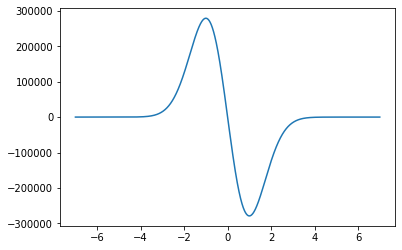

In [57]:
''' 
  Codice principale: l'esecuzione dello script parte da qui
'''
n       = 14000
nmatch  = 10000
xi      = np.linspace(-7.,7,n)
h       = xi[1]-xi[0]


e1 = findE(1.2,1.7,0.0001)
print ("Energy 1", e1)

Emin=0
Emax=4

psiTot=np.empty(n)
for i in range(0,nmatch+1):
        psiTot[i]=psil[i]

for i in range(nmatch+1,n):
        psiTot[i]=psir[i]


plt.plot(xi,psiTot)
plt.show()



alpha = 187526799809.2301


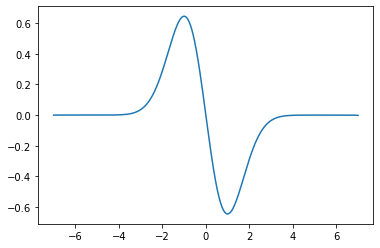

In [58]:
epsilon = 1.5   # o altra energia di stato definito eps = (n+1/2)
psi1=numerov(0,n-1,epsilon)

I1=trapz(abs(psi1)**2,xi)
print("alpha =",I1)

psi1N=psi1/math.sqrt(abs(I1))

plt.plot(xi,psi1N)
plt.show()